In [15]:
# Bring your packages onto the path
import sys,os
sys.path.append(os.path.abspath(os.path.join('..'))) #'entropytriangle main directory
from entropytriangle import * #importing all modules necessary for the plotting
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from math import ceil
# compute classification accuracy for the logistic regression model
from sklearn import metrics

In [2]:
df = pd.read_csv('Iris.csv',index_col='Id')

In [3]:
features = df.columns
# Separating out the features
x = df[df.columns[df.columns != 'Species']]
# Separating out the target
y = df['Species']

In [4]:
from sklearn.model_selection import train_test_split
## Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42,test_size=0.9)

In [5]:
## Import the Classifier.
from sklearn.neighbors import KNeighborsClassifier
## Instantiate the model with 5 neighbors. 
knn = KNeighborsClassifier(n_neighbors=3)
## Fit the model on the training data.
knn.fit(X_train, y_train)
## See how the model performs on the test data.
y_pred = knn.predict(X_test)
#y_pred = pd.DataFrame(knn.predict(X_test))
print(metrics.accuracy_score(y_test, y_pred))

0.9629629629629629


In [6]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(knn.predict(X_test))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
Nxy = confusion_matrix ; base = 2
dims = Nxy.shape # dim is a tuple wiht dim[0] rows  and dim[1] columns

if(len(dims) != 2):
    exit("It must be a 2 dimensions array")

Nx = Nxy.sum(axis = 1) ; Ny = Nxy.sum(axis = 0) 
Hx = entropy(Nx , base = base) ; Hy = entropy(Ny , base = base)
Ux = np.log2(dims[0]) ; Uy = np.log2(dims[1])
Hxy = entropy(np.ravel(Nxy),base = base)
VI_P = [(Hxy-Hy),(Hxy-Hx)]

#edf = pd.DataFrame([Ux,Uy,Hx,Hy,Hxy], columns = ['Ux','Uy','Hx','Hy','Hxy'])
edf = pd.DataFrame({'Type':['X','Y'],'H_P':[Hx,Hy] , 'H_U' : [Ux,Uy] ,'DeltaH_P':[(Ux - Hx) , (Uy - Hy)] , 'M_P': [Hx - VI_P[0] , Hy - VI_P[1]] , 'VI_P': VI_P }, columns = ['Type','H_U','H_P','DeltaH_P','M_P','VI_P'])
edf = edf.append(edf.apply(lambda x: np.sum(x,axis=0),axis = 0), ignore_index=True)
#edf.loc['All'] = edf.sum(axis = 0)
edf = edf.set_index('Type')

In [7]:
X = y_test ; Y = y_pred

In [8]:
H_U = np.array([np.sum(X.apply((lambda x : np.log2(len(pd.unique(x)))), axis = 0).values) , np.sum(Y.apply((lambda x : np.log2(len(pd.unique(x)))), axis = 0).values)])
H_P = np.array([ent(sjoin(X,lis = X.columns)),ent(sjoin(Y,lis = Y.columns))])
VI_P = np.array([condentropy_joint(X,Y,base = base),condentropy_joint(Y,X,base = base)])

edf = pd.DataFrame({'Type' : ['X','Y'], 'H_U': H_U , 'H_P': H_P , 'DeltaH_P' : H_U - H_P, }, columns = ['Type','H_U','H_P','DeltaH_P'])
edf['M_P'] = H_P - VI_P
edf['VI_P'] = VI_P
edf = edf.set_index('Type')
edf.loc['XY'] = edf.sum(axis = 0)

In [9]:
X = discretization(X)
entropy(X)

/Users/jaime.de.los.rios/Documents/GitHub/entropytriangle/entropytriangle/auxfunc.py:39: UserWarning: Discretizing data!
  warning("Discretizing data!")


array([4.40899093])

In [10]:
ent(X['Species'],base = 2)

1.5833150362593733

In [11]:
entropy(X)

array([4.40899093])

In [12]:
confusion_matrix

array([[48,  0,  0],
       [ 0, 39,  5],
       [ 0,  0, 43]])

In [13]:
edf

,H_U,H_P,DeltaH_P,M_P,VI_P
Type,,,,,
X,1.584963,1.583315,0.001647,0.043118,1.540197
Y,1.584963,1.578393,0.006570,0.043118,1.535274
XY,3.169925,3.161708,0.008217,0.086236,3.075471


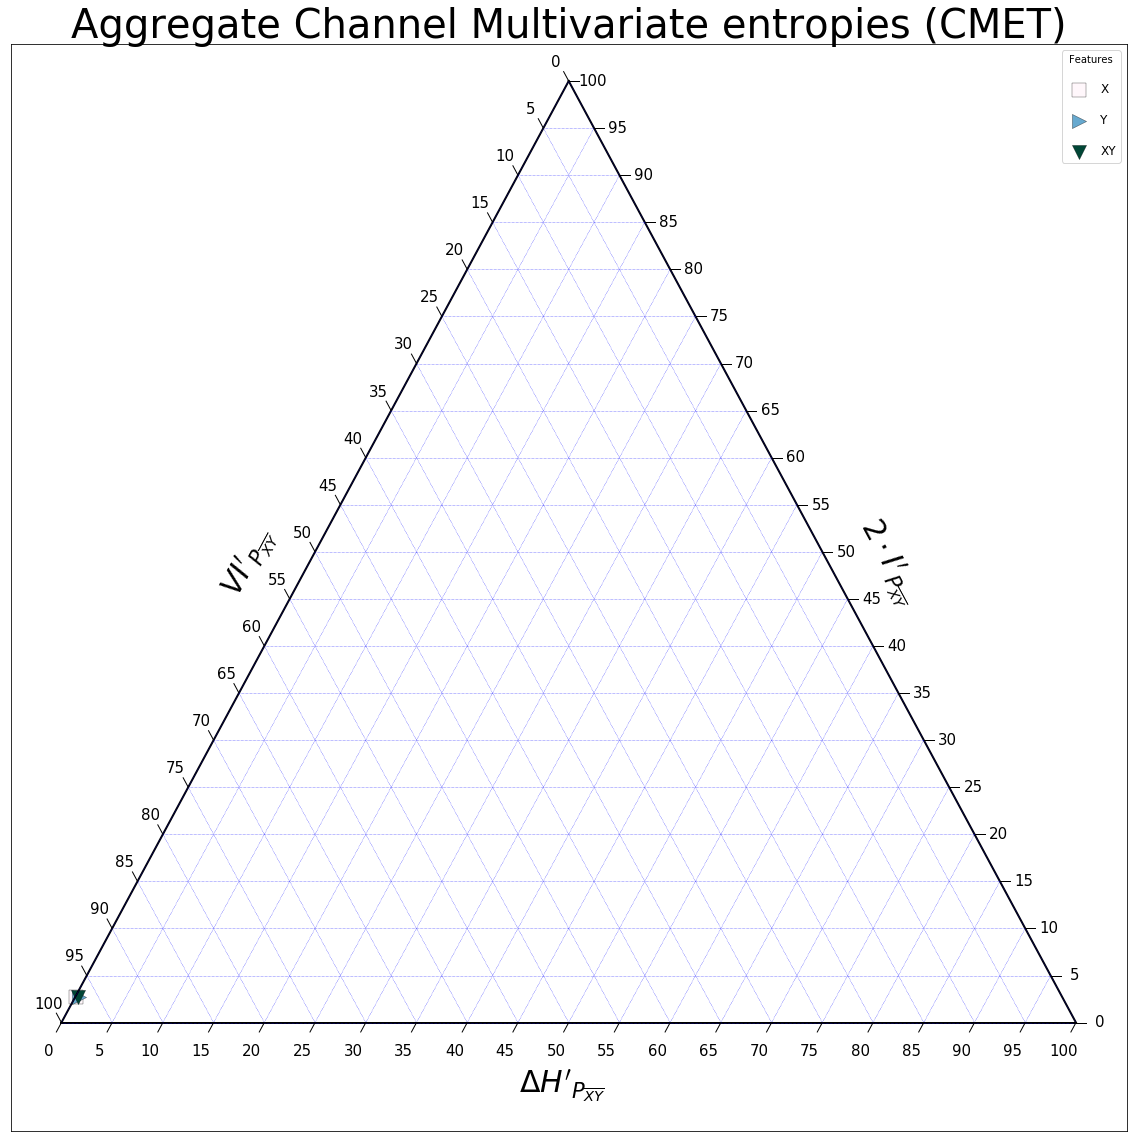

[array([ 0.10394343,  2.72045841, 97.17559816]),
 array([ 0.41450617,  2.72045841, 96.86503542]),
 array([ 0.2592248 ,  2.72045841, 97.02031679])]

In [14]:
etplot(edf)

In [16]:
df = pd.read_csv('Iris.csv', index_col='Id')

In [18]:
df = discretization(df)

/Users/jaime.de.los.rios/Documents/GitHub/entropytriangle/entropytriangle/auxfunc.py:39: UserWarning: Discretizing data!
  warning("Discretizing data!")
